In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/StudentsPerformance.csv')

In [ ]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [ ]:
df.shape

(1000, 8)

In [ ]:
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
df.nunique()

,0
gender,2
race/ethnicity,5
parental level of education,6
lunch,2
test preparation course,2
math score,81
reading score,72
writing score,77


In [ ]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [ ]:
print("Categories in 'gender' variable:", end="")
print(df['gender'].unique())

print("\nCategories in 'race/ethnicity' variable:", end="")
print(df['race/ethnicity'].unique())

print("\nCategories in 'parental level of education' variable:", end="")
print(df['parental level of education'].unique())

print("\nCategories in 'lunch' variable:", end="")
print(df['lunch'].unique())

print("\nCategories in 'test preparation course' variable:", end="")
print(df['test preparation course'].unique())

print("\nCategories in 'math score' variable:", end="")
print(df['math score'].unique())

Categories in 'gender' variable:['female' 'male']

Categories in 'race/ethnicity' variable:['group B' 'group C' 'group A' 'group D' 'group E']

Categories in 'parental level of education' variable:["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Categories in 'lunch' variable:['standard' 'free/reduced']

Categories in 'test preparation course' variable:['none' 'completed']

Categories in 'math score' variable:[ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]


In [ ]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O'] # Pake O(oh besar menandatakan Object)

print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math score', 'reading score', 'writing score']

We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [ ]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total_score'] / 3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [ ]:
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()
math_full = df[df['math score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Reading: {reading_full}')
print(f'Number of students with full marks in writing: {writing_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Reading: 17
Number of students with full marks in writing: 14


In [ ]:
total_students = len(df)
percentage_math_full = (math_full / total_students) * 100
percentage_writing_full = (writing_full / total_students) * 100
percentage_reading_full = (reading_full / total_students) * 100

print(f'Percentage of students with full marks in Maths: {percentage_math_full:.2f}%')
print(f'Percentage of students with full marks in Writing: {percentage_writing_full:.2f}%')
print(f'Percentage of students with full marks in Reading: {percentage_reading_full:.2f}%')

Percentage of students with full marks in Maths: 0.70%
Percentage of students with full marks in Writing: 1.40%
Percentage of students with full marks in Reading: 1.70%


In [ ]:
reading_less_20 = df[df['reading score'] <= 20]['average'].count()
writing_less_20 = df[df['writing score'] <= 20]['average'].count()
math_less_20 = df[df['math score'] <= 20]['average'].count()

print(f'Number of students with less than or equal to 20 marks in Reading: {reading_less_20}')
print(f'Number of students with less than or equal to 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than or equal to 20 marks in Math: {math_less_20}')

Number of students with less than or equal to 20 marks in Reading: 1
Number of students with less than or equal to 20 marks in Writing: 3
Number of students with less than or equal to 20 marks in Math: 4


In [ ]:
total_students = len(df)
percentage_reading_less_20 = (reading_less_20 / total_students) * 100
percentage_writing_less_20 = (writing_less_20 / total_students) * 100
percentage_math_less_20 = (math_less_20 / total_students) * 100

print(f'Percentage of students with full marks in Reading: {percentage_reading_less_20:.2f}%')
print(f'Percentage of students with full marks in Writing: {percentage_writing_less_20:.2f}%')
print(f'Percentage of students with full marks in Math: {percentage_math_less_20:.2f}%')

Percentage of students with full marks in Reading: 0.10%
Percentage of students with full marks in Writing: 0.30%
Percentage of students with full marks in Math: 0.40%


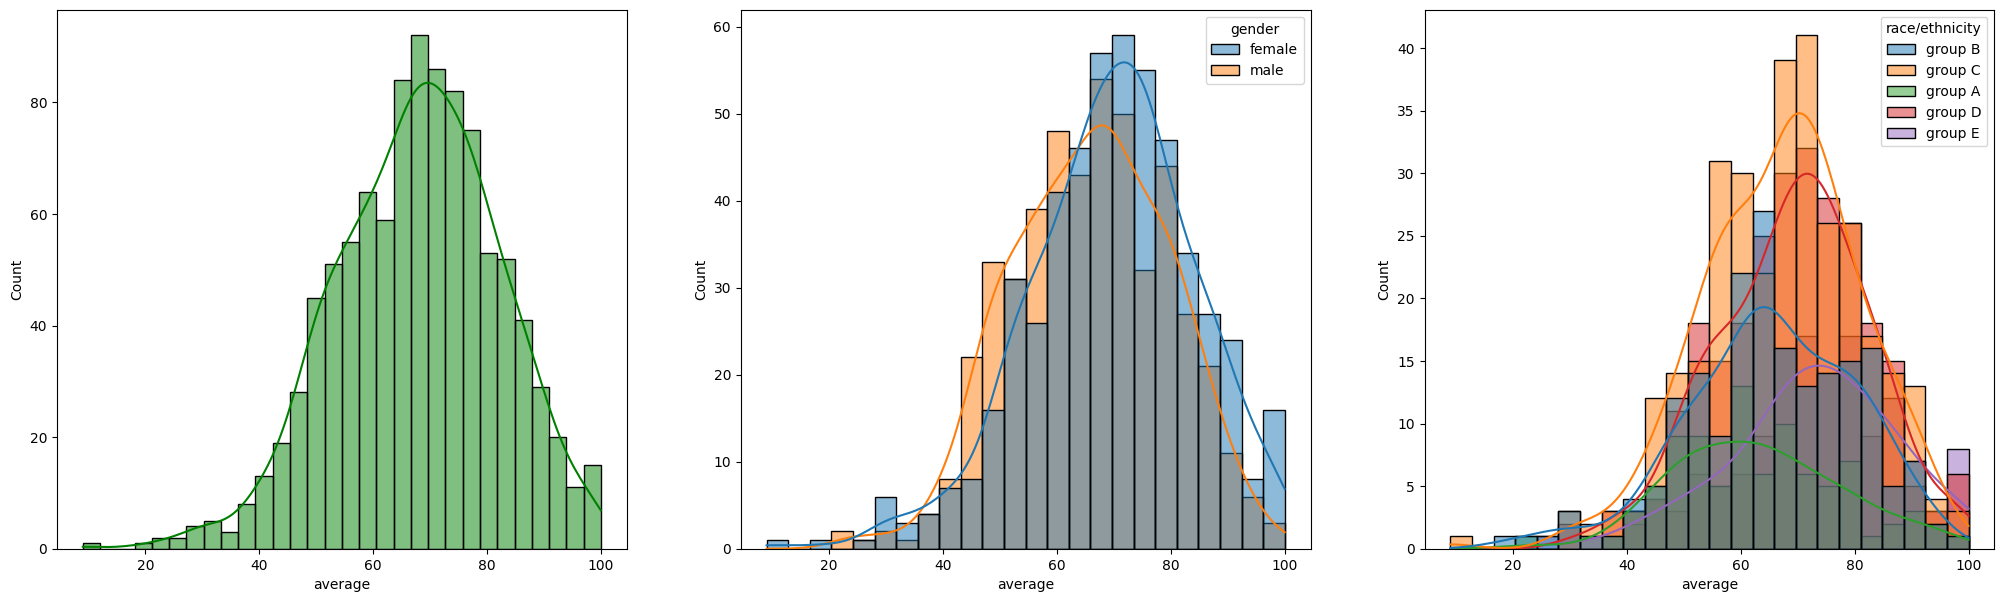

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(25, 7)) # membuat canvas 15inchi, 7inchi, 1,2 (satu baris 2 kolom)

sns.histplot(data=df, x='average', bins=30, kde=True, color='g', ax=axs[0])
sns.histplot(data=df, x='average', kde=True, hue='gender', ax=axs[1])
sns.histplot(data=df, x='average', kde=True, hue='race/ethnicity', ax=axs[2])

plt.show()

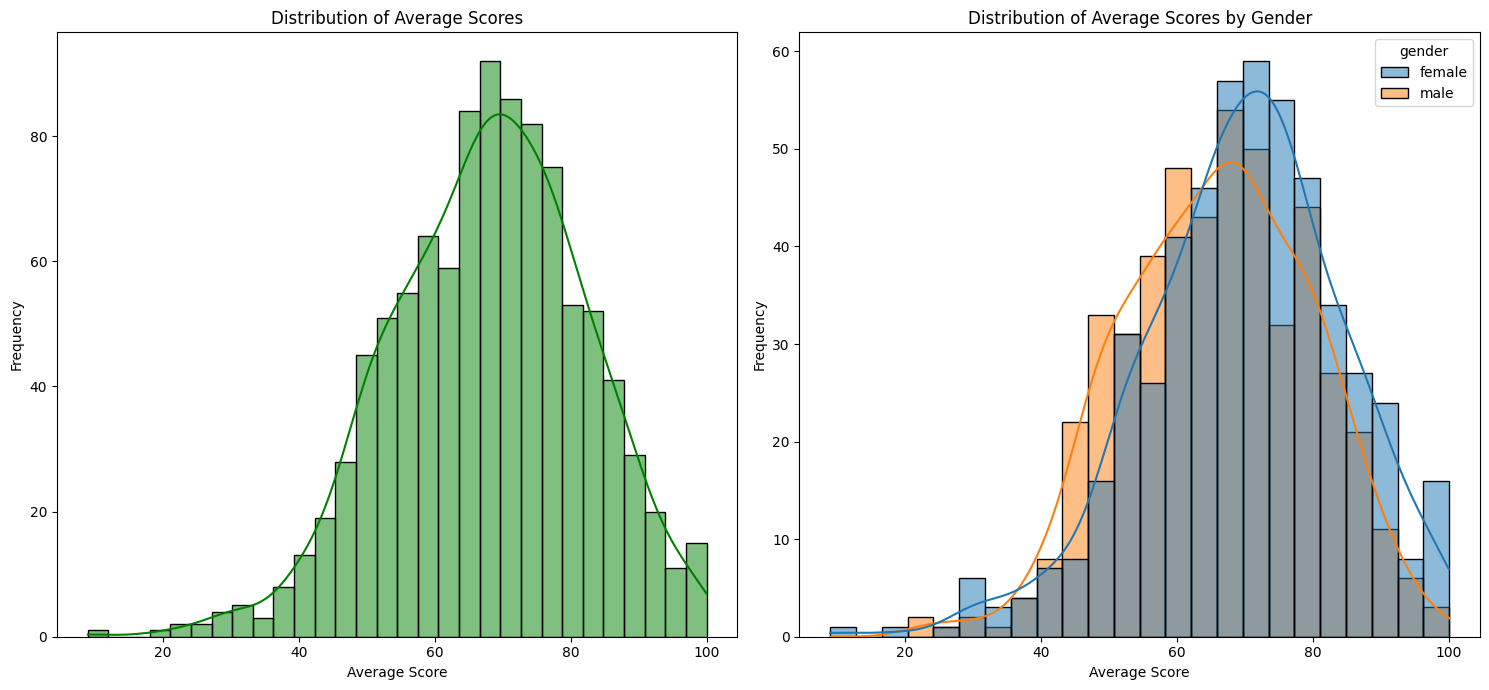

In [ ]:
# Create a subplot with two histograms side by side
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Plot the first histogram with KDE for the overall average score
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')
plt.title('Distribution of Average Scores')
plt.xlabel('Average Score')
plt.ylabel('Frequency')

# Plot the second histogram with KDE, differentiated by gender
plt.subplot(122)
sns.histplot(data=df, x='average', kde=True, hue='gender')
plt.title('Distribution of Average Scores by Gender')
plt.xlabel('Average Score')
plt.ylabel('Frequency')

# Display the subplots
plt.tight_layout()
plt.show()

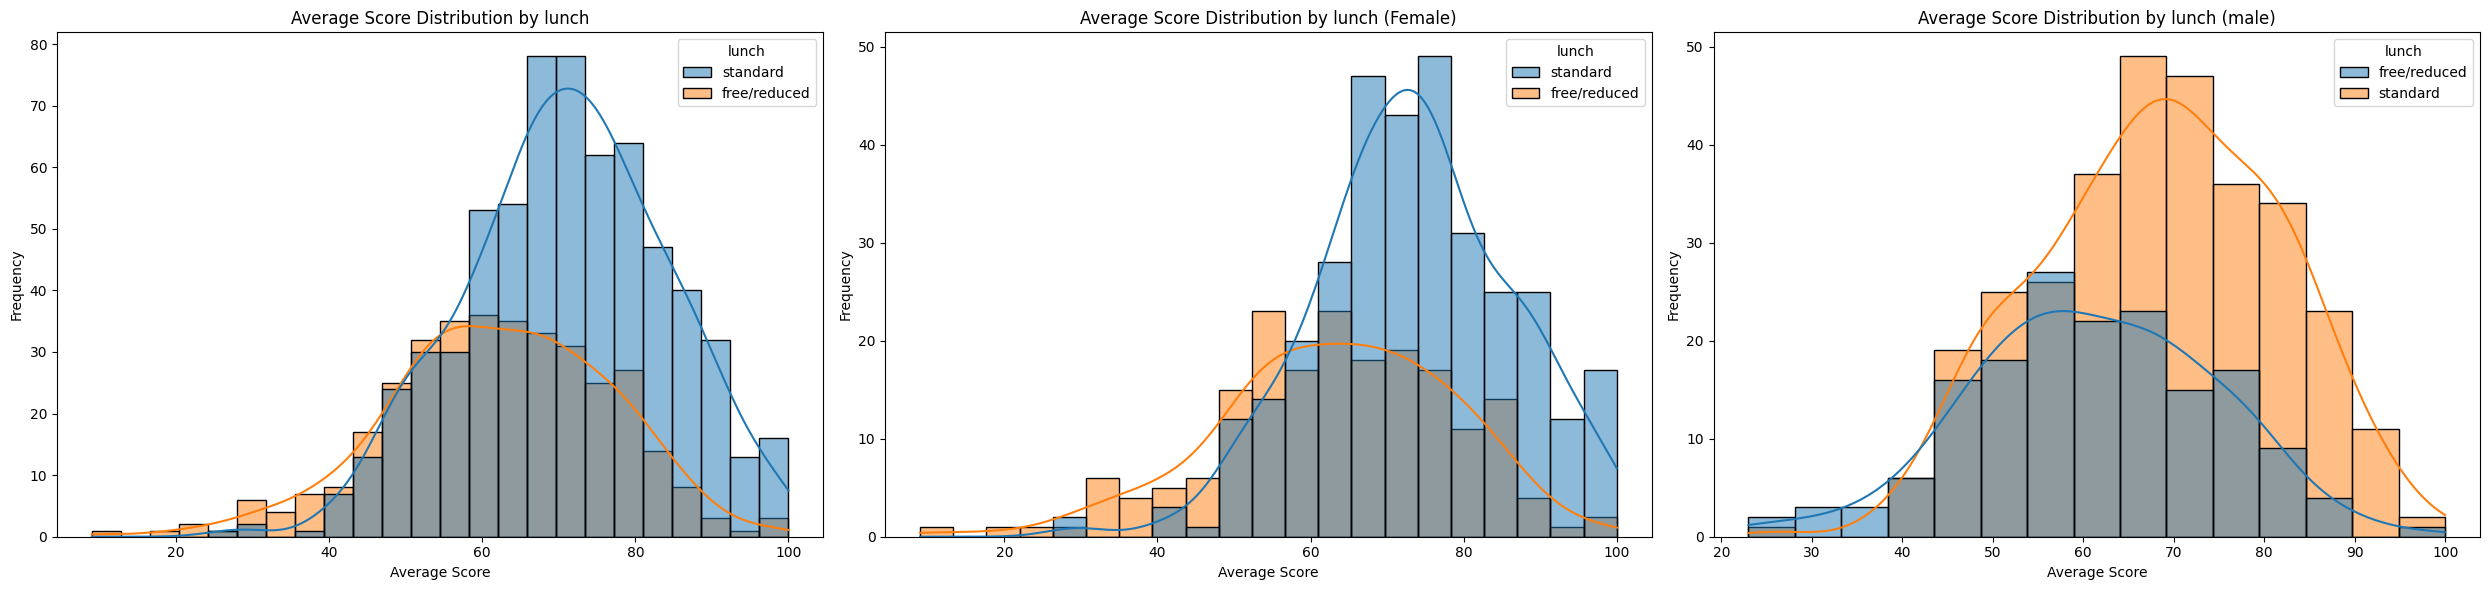

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(25, 6)) # membuat canvas 15inchi, 7inchi, 1,2 (satu baris 2 kolom)

plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='lunch')
plt.title('Average Score Distribution by lunch')
plt.xlabel('Average Score')
plt.ylabel('Frequency')

plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='lunch')
plt.title('Average Score Distribution by lunch (Female)')
plt.xlabel('Average Score')
plt.ylabel('Frequency')

plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='lunch')
plt.title('Average Score Distribution by lunch (male)')
plt.xlabel('Average Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

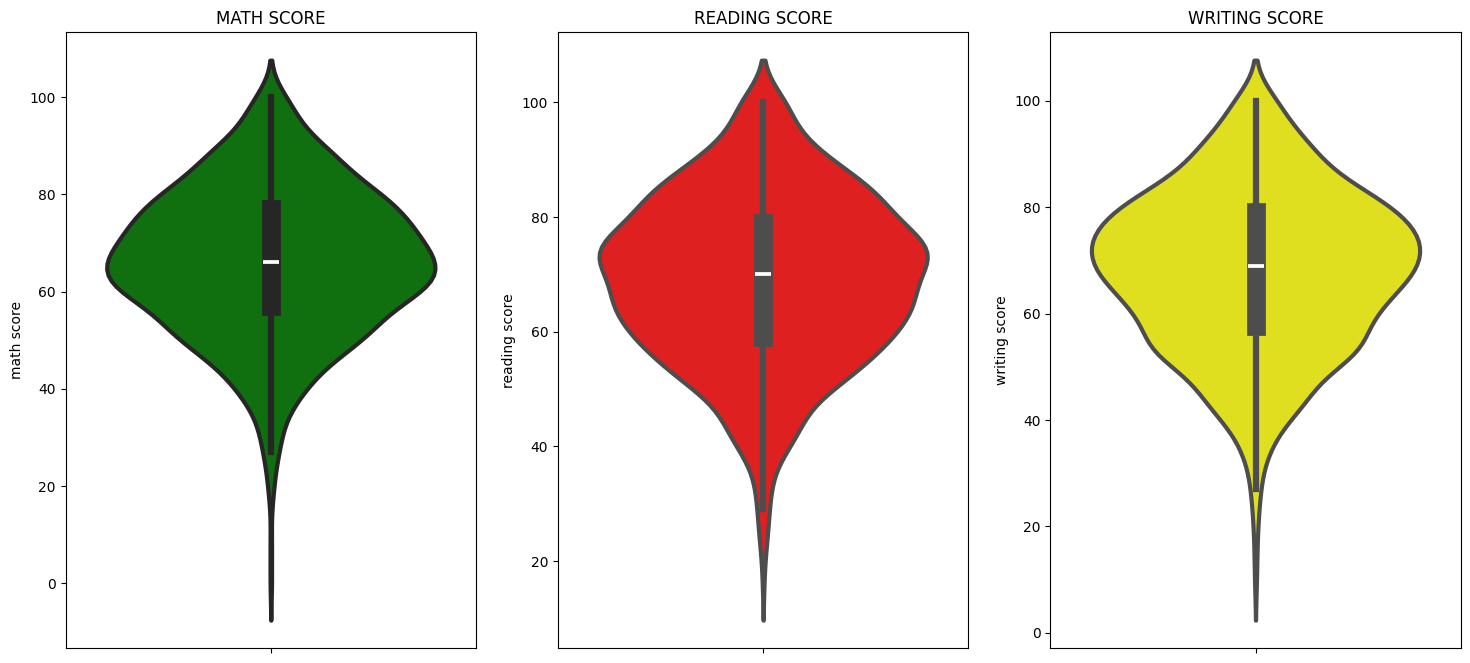

In [ ]:
plt.figure(figsize=(18, 8))

plt.subplot(1, 3, 1)
plt.title('MATH SCORE')
sns.violinplot(y='math score', data=df, color='green', linewidth=3)

plt.subplot(1, 3, 2)
plt.title('READING SCORE')
sns.violinplot(y='reading score', data=df, color='red', linewidth=3)

plt.subplot(1, 3, 3)
plt.title('WRITING SCORE')
sns.violinplot(y='writing score', data=df, color='yellow', linewidth=3)

plt.show()

(np.float64(-1.25), np.float64(1.25), np.float64(-1.25), np.float64(1.25))

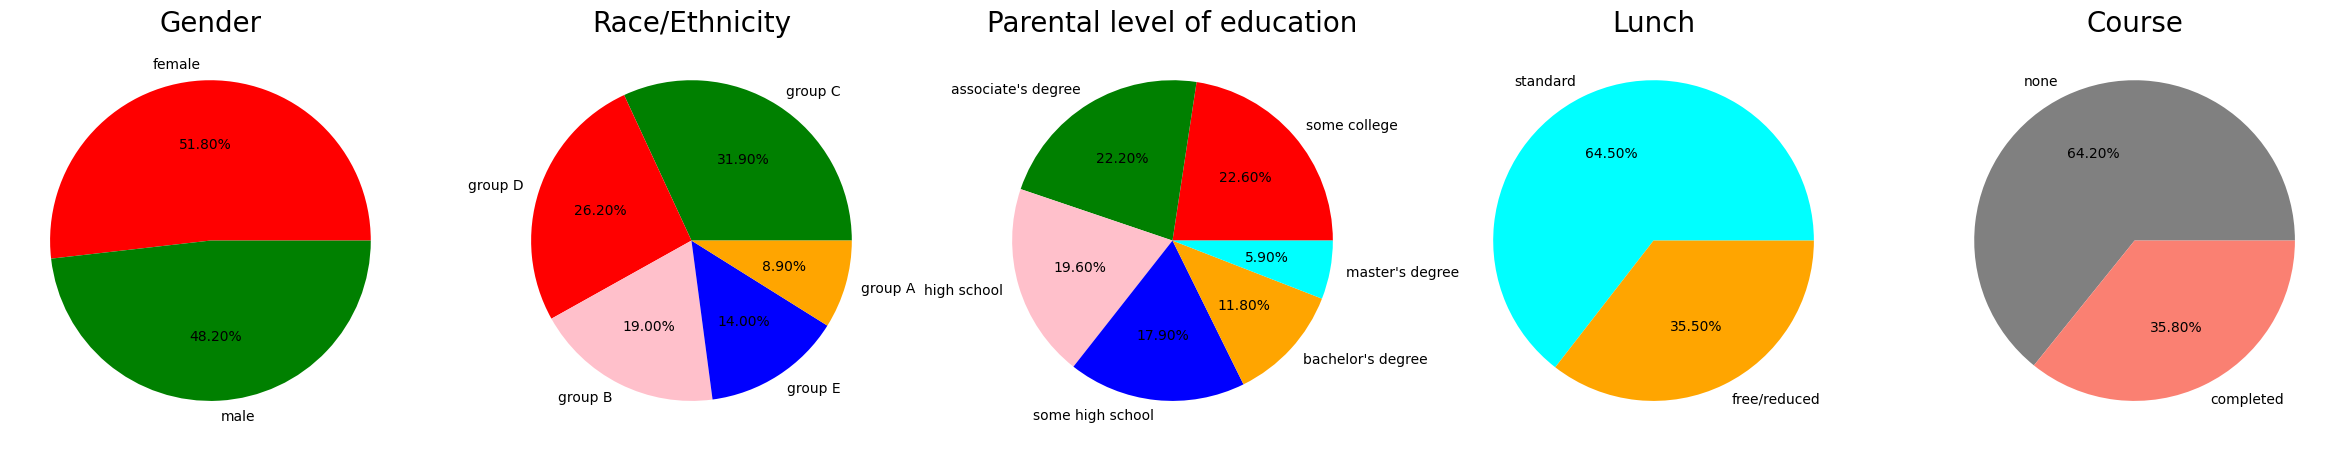

In [ ]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = size.index
color = ['red', 'green']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = size.index
color = ['green', 'red', 'pink', 'blue', 'orange']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['parental level of education'].value_counts()
labels = size.index
color = ['red', 'green', 'pink', 'blue', 'orange', 'cyan']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Parental level of education', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = df['lunch'].value_counts()
labels = size.index
color = ['cyan', 'orange']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = df['test preparation course'].value_counts()
labels = size.index
color = ['gray', 'salmon']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Course', fontsize=20)
plt.axis('off')

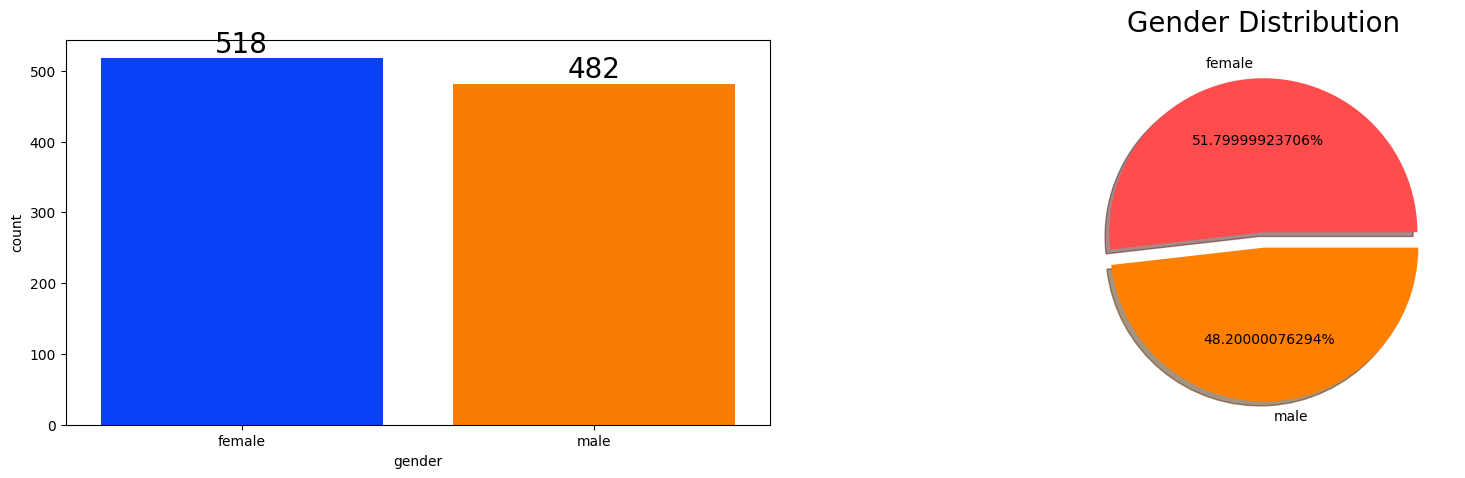

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(20, 5))

sns.countplot(x=df['gender'], data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
  ax[0].bar_label(container, color='black', size=20)

gender_counts = df['gender'].value_counts()
plt.pie(x=gender_counts, labels=gender_counts.index, explode=[0, 0.1],
  autopct='%1.11f%%', shadow=True, colors=['#ff4d4d', '#ff8000'])
plt.title('Gender Distribution', fontsize=20)

plt.show()

In [ ]:
gender_group = df.groupby('gender').mean(numeric_only=True)
print(gender_group)

        math score  reading score  writing score  total_score    average
gender                                                                  
female   63.633205      72.608108      72.467181   208.708494  69.569498
male     68.728216      65.473029      63.311203   197.512448  65.837483


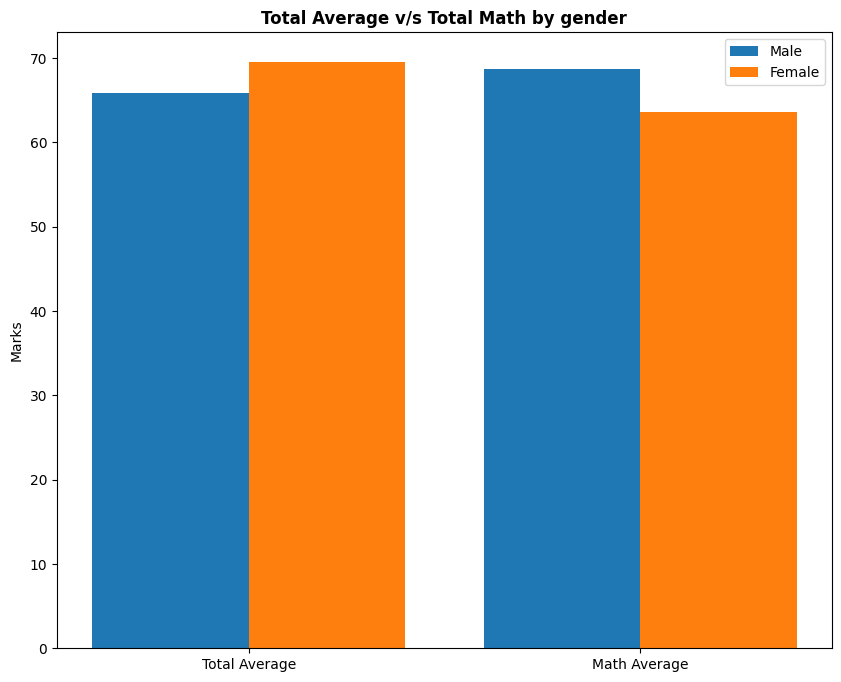

In [ ]:
plt.figure(figsize=(10, 8))

X =  ['Total Average', 'Math Average']

female_scores = [gender_group['average'][0], gender_group['math score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total Average v/s Total Math by gender",  fontweight='bold')
plt.legend()
plt.show()

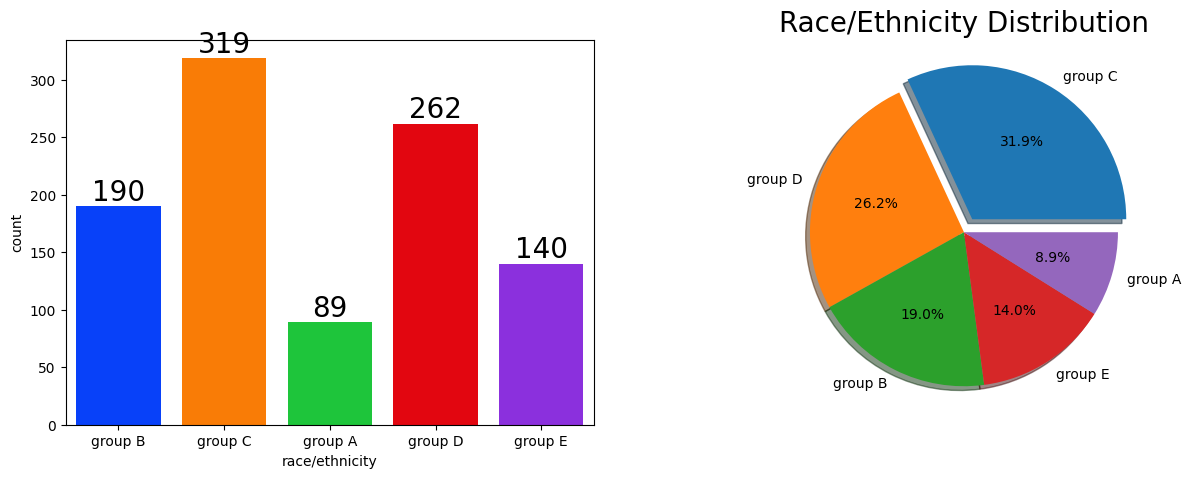

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(x=df['race/ethnicity'], data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
  ax[0].bar_label(container, color='black', size=20)

plt.pie(x=df['race/ethnicity'].value_counts(), labels=df['race/ethnicity'].value_counts().index,
        explode=[0.1, 0, 0, 0, 0], autopct='%1.1f%%', shadow=True)

plt.title('Race/Ethnicity Distribution', fontsize=20)
plt.show()

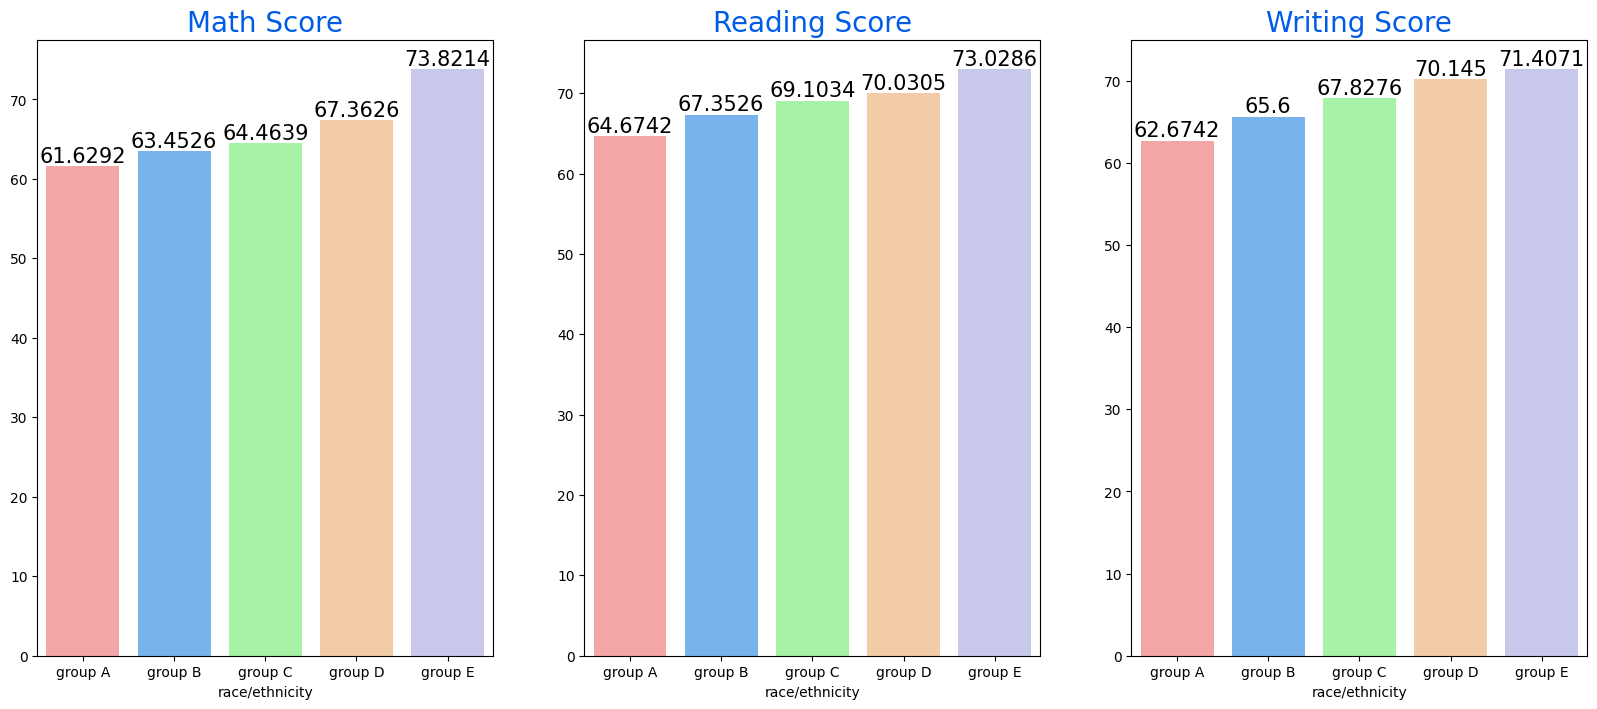

In [ ]:
Group_data2 = df.groupby('race/ethnicity')

math_palette = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']
reading_palette = ['#ffb3e6', '#8cff66', '#c2f0c2', '#ffcc99', '#ffb366']
writing_palette = ['#66b3ff', '#99ff99', '#ff9999', '#c2c2f0', '#ffcc99']

f, ax = plt.subplots(1, 3, figsize=(20, 8))

sns.barplot(x=Group_data2['math score'].mean().index,
    y=Group_data2['math score'].mean().values, palette=math_palette, ax=ax[0])
ax[0].set_title('Math Score', color='#005ce6', size=20)
for container in ax[0].containers:
  ax[0].bar_label(container, color='black', size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,
    y=Group_data2['reading score'].mean().values, palette=math_palette, ax=ax[1])
ax[1].set_title('Reading Score', color='#005ce6', size=20)
for container in ax[1].containers:
  ax[1].bar_label(container, color='black', size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,
    y=Group_data2['writing score'].mean().values, palette=math_palette, ax=ax[2])
ax[2].set_title('Writing Score', color='#005ce6', size=20)
for container in ax[2].containers:
  ax[2].bar_label(container, color='black', size=15)

plt.show()

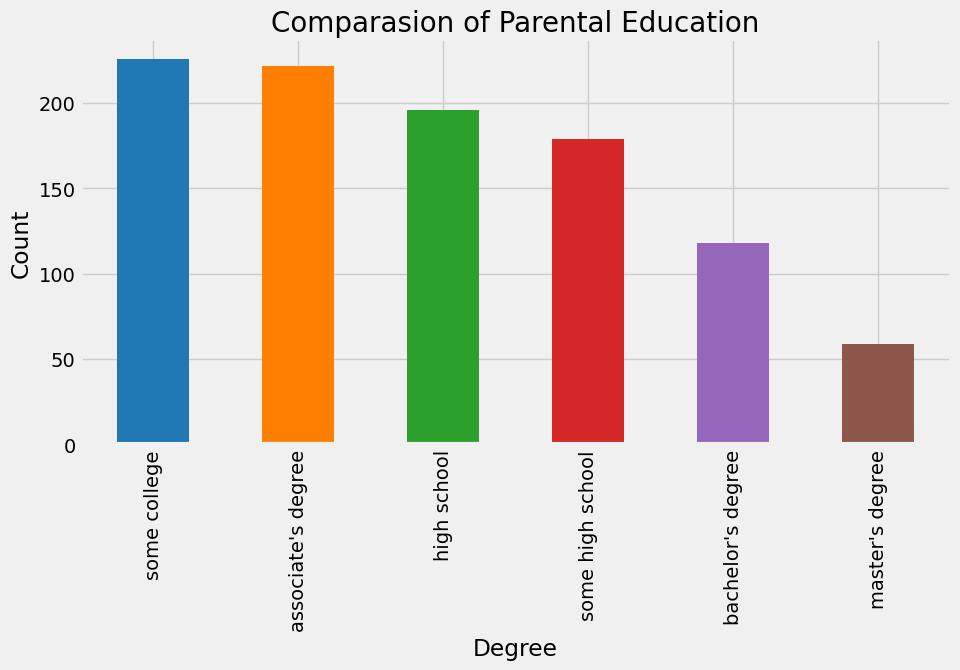

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('fivethirtyeight')

df['parental level of education'].value_counts().plot(kind='bar', color=['#1f77b4', '#ff7f03', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])
plt.title('Comparasion of Parental Education', fontweight=30, fontsize=20)
plt.xlabel('Degree')
plt.ylabel('Count')

plt.show()

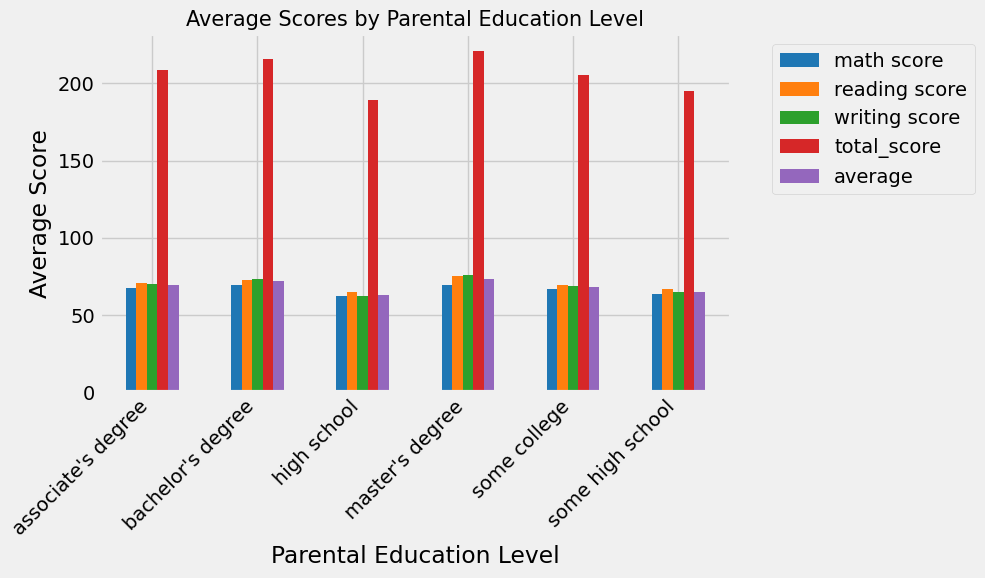

In [ ]:
plt.style.use('seaborn-v0_8-colorblind')
plt.rcParams['figure.figsize'] = (10, 6)

mean_scores_by_education = df.groupby('parental level of education').mean(numeric_only=True)
mean_scores_by_education.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])

plt.title('Average Scores by Parental Education Level', fontsize=15)
plt.xlabel('Parental Education Level')
plt.ylabel('Average Score')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

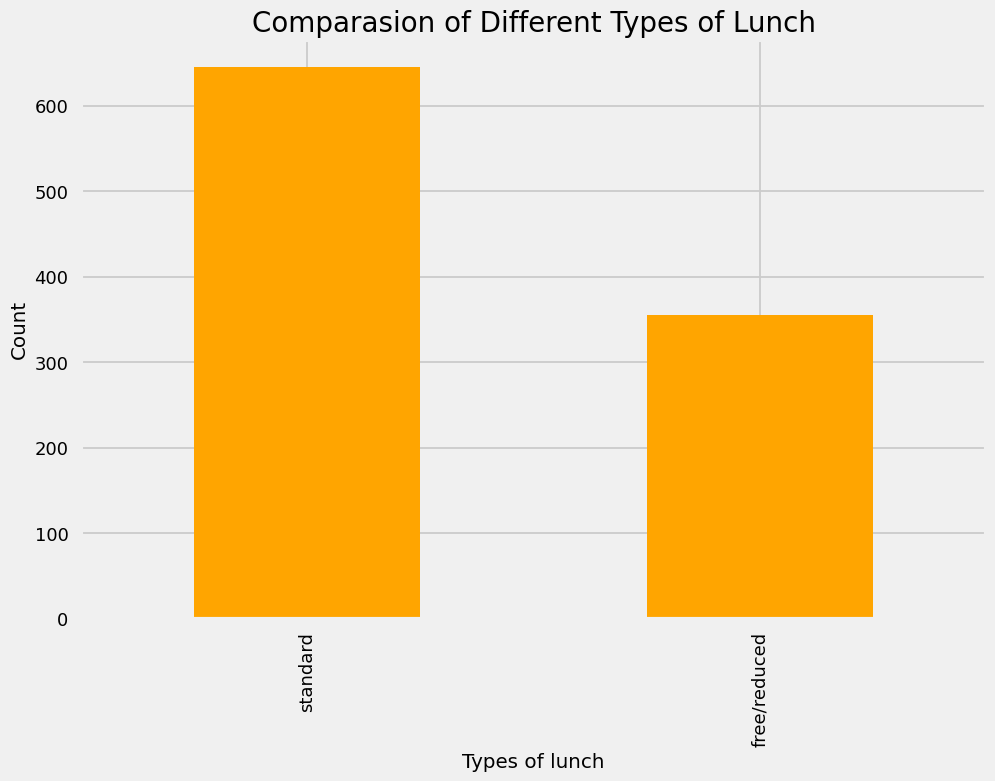

In [ ]:
plt.rcParams['figure.figsize'] = (1, 1)
plt.style.use('seaborn-v0_8-talk')

df['lunch'].value_counts().plot(kind='bar', color='Orange')

plt.title('Comparasion of Different Types of Lunch', fontweight=30, fontsize=20)
plt.xlabel('Types of lunch')
plt.ylabel('Count')

plt.show()

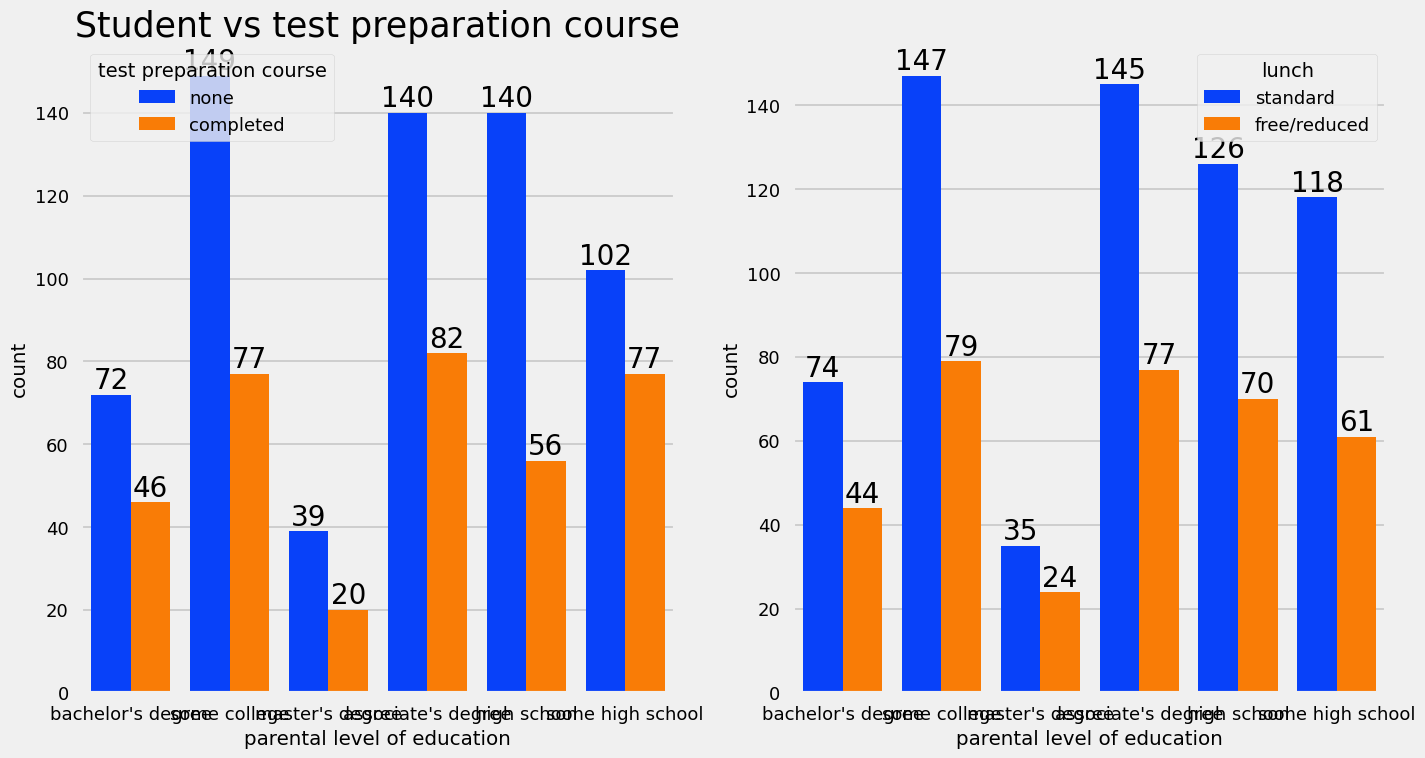

In [ ]:
f, ax=plt.subplots(1, 2, figsize=(15, 8))

sns.countplot(x=df['parental level of education'], data=df, palette='bright', hue='test preparation course', saturation=0.95, ax=ax[0])
ax[0].set_title('Student vs test preparation course', color='black', size=25)

for container in ax[0].containers:
  ax[0].bar_label(container, color='black', size=20)

sns.countplot(x=df['parental level of education'], data=df, palette='bright', hue='lunch', saturation=0.95, ax=ax[1])

for container in ax[1].containers:
  ax[1].bar_label(container, color='black', size=20)

<Axes: xlabel='lunch', ylabel='writing score'>

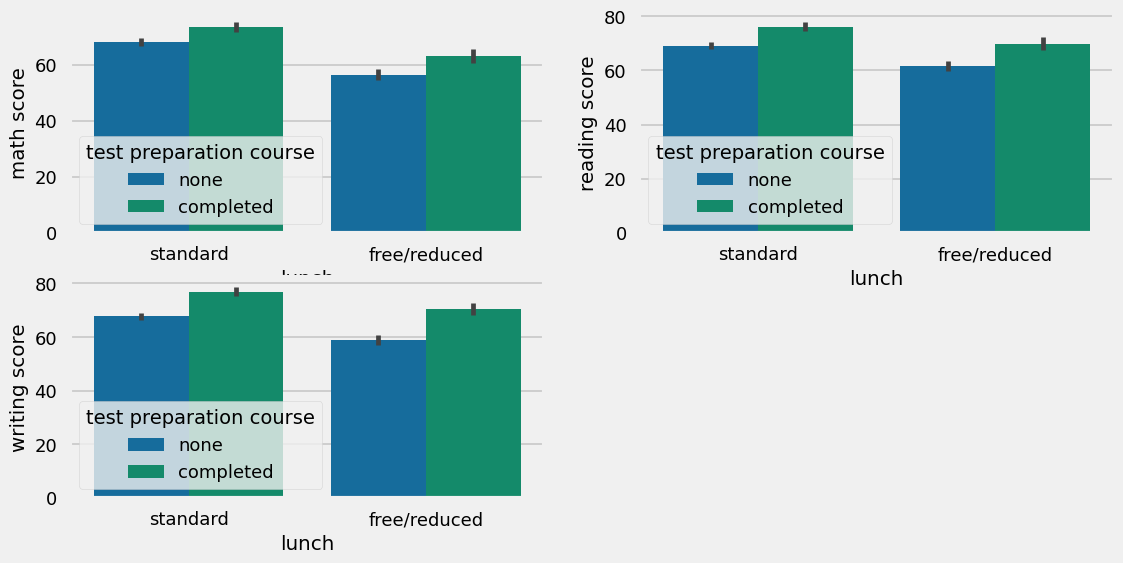

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.barplot(x=df['lunch'], y=df['math score'], hue=df['test preparation course'])

plt.subplot(2, 2, 2)
sns.barplot(x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])

plt.subplot(2, 2, 3)
sns.barplot(x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])

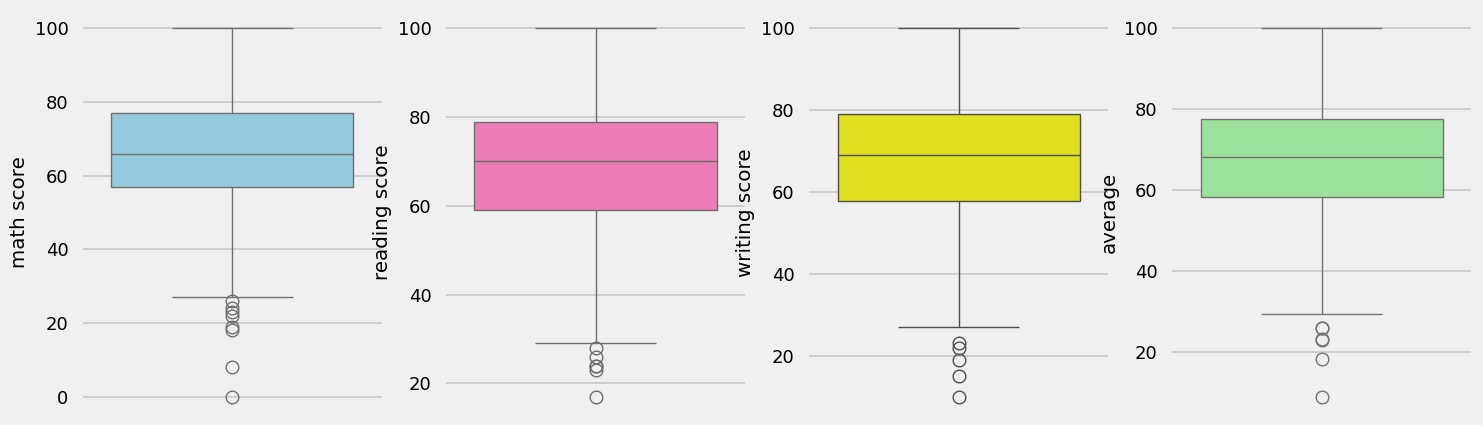

In [ ]:
plt.subplots(1, 4, figsize=(16, 5))

plt.subplot(141)
sns.boxplot(df['math score'], color='skyblue')

plt.subplot(142)
sns.boxplot(df['reading score'], color='hotpink')

plt.subplot(143)
sns.boxplot(df['writing score'], color='yellow')

plt.subplot(144)
sns.boxplot(df['average'], color='lightgreen')

plt.show()

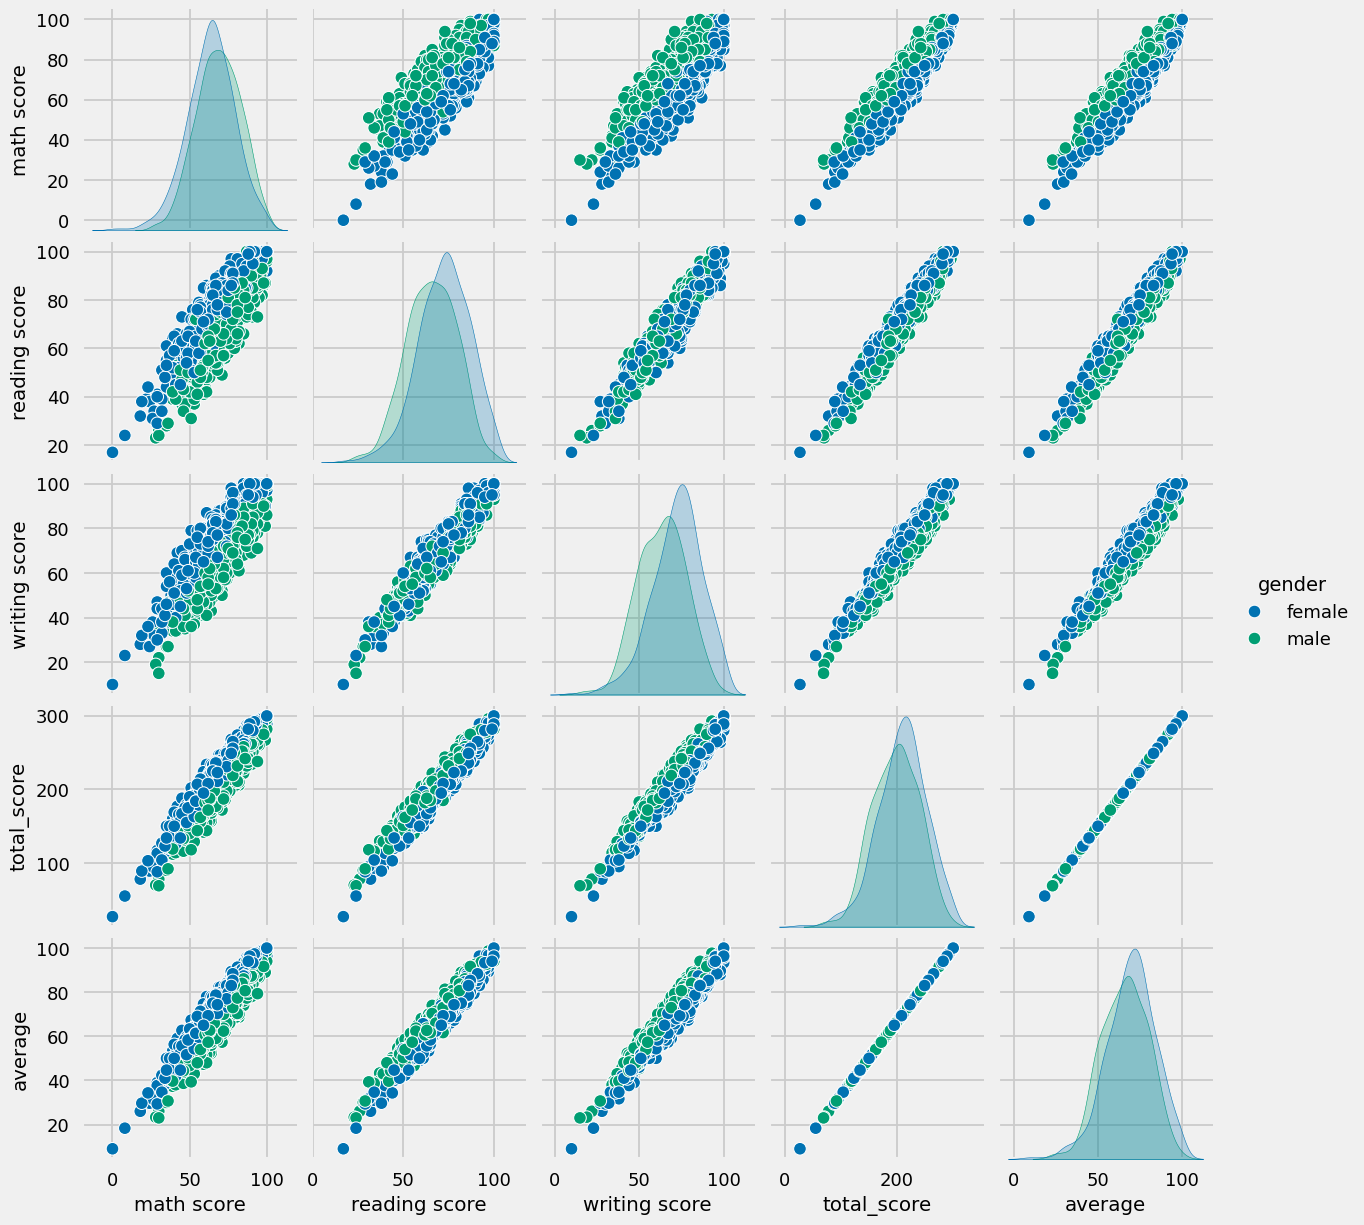

In [ ]:
sns.pairplot(df, hue='gender')
plt.show()

In [76]:
%cd /content/

/content


In [78]:
!mkdir student_performance4

In [79]:
%cd student_performance4/

/content/student_performance4


In [80]:
!git init

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/student_performance4/.git/


In [104]:
!echo "Hello from Colab!" > README.md
!git init
!git add README.md
!git commit -m "first commit"
!git branch -M main
!git remote add origin https://github.com/FaizzDevs/student_performance.git
!git push -u origin main

Reinitialized existing Git repository in /content/student_performance4/.git/
On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean
error: remote origin already exists.
Branch 'main' set up to track remote branch 'main' from 'origin'.
Everything up-to-date


In [110]:
!pwd

/content/student_performance4


In [115]:
%cd /content/student_performance4/

/content/student_performance4


In [118]:
!git add .
!git commit -m "Add Colab notebook"
!git push

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean
Everything up-to-date


In [119]:
!ls /content/

drive  sample_data  student_performance  student_performance4


In [122]:
!cp "/content/drive/Student Performance.ipynb" /content/student_performance4/

drive  sample_data  student_performance4
